# Stock Price Predictor

## Project Description
It is a simple stock price prediction model using historical data of Stock X

### Objectives and Requirements:-
1) Predicting the stock prices of a Company X
2) Some useful APIs and websites has been used :-
   * Yahoo Finanace

In [1]:
import pandas as pd

In [2]:
goog = pd.read_csv('./data/GOOG.csv')

In [3]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900
1,2022-09-27,99.910004,100.459999,97.339996,98.089996,98.089996,24225000
2,2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000
3,2022-09-29,99.300003,99.300003,96.519997,98.089996,98.089996,21921500
4,2022-09-30,97.730003,99.494003,96.029999,96.150002,96.150002,26277800


In [4]:
goog.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,108.621844,110.123840,107.464192,108.804460,108.804460,2.679028e+07
std,15.505143,15.528089,15.511418,15.505354,15.505354,1.105282e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.749998,97.344997,94.440003,95.835001,95.835001,2.035162e+07
50%,103.784999,105.842499,103.144997,104.760002,104.760002,2.402970e+07
75%,123.473749,124.872502,122.402498,123.350003,123.350003,3.010655e+07
max,138.830002,139.929993,137.630005,138.990005,138.990005,9.779860e+07


In [6]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [8]:
goog.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
goog['Date'] = pd.to_datetime(goog['Date'])

In [13]:
goog.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [14]:
goog.set_index(keys='Date', inplace=True)

In [15]:
goog.index

DatetimeIndex(['2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-03', '2022-10-04', '2022-10-05',
               '2022-10-06', '2022-10-07',
               ...
               '2023-09-11', '2023-09-12', '2023-09-13', '2023-09-14',
               '2023-09-15', '2023-09-18', '2023-09-19', '2023-09-20',
               '2023-09-21', '2023-09-22'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

Let's Check our data for the outliers by using IQR technique.

In [27]:
def IQRtech(columns):
    for col in columns:
        close_column = goog[col]
        Q1 = close_column.quantile(0.25)
        Q3 = close_column.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = close_column[(close_column < lower_bound) | (close_column > upper_bound)]
        
        print(f'''Outliers {col} :''')
        print(outliers)

In [28]:
IQRtech(goog.columns)

Outliers Open :
Series([], Name: Open, dtype: float64)
Outliers High :
Series([], Name: High, dtype: float64)
Outliers Low :
Series([], Name: Low, dtype: float64)
Outliers Close :
Series([], Name: Close, dtype: float64)
Outliers Adj Close :
Series([], Name: Adj Close, dtype: float64)
Outliers Volume :
Date
2022-10-26    71504300
2022-10-27    54036500
2022-11-03    48510400
2022-12-16    48485500
2023-01-20    53704800
2023-02-02    46622600
2023-02-08    73546000
2023-02-09    97798600
2023-02-10    49325300
2023-03-16    54499500
2023-03-17    76140300
2023-05-10    47533500
2023-05-11    57115100
2023-06-16    56686800
2023-07-21    56498100
2023-07-26    46216900
2023-09-15    48947600
Name: Volume, dtype: int64


<Axes: >

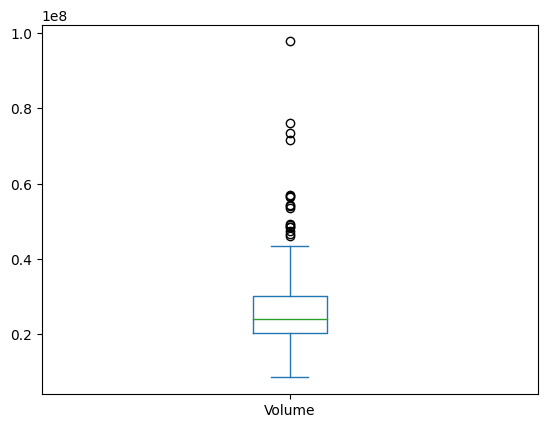

In [29]:
goog.Volume.plot.box()

* We clearly do not have any outliers in Closing price in our data. So, we can certainly use moving averages of about 7 and 30 days of closing price for predicting the further closing prices.

In [30]:
from sklearn.model_selection import train_test_split

In [37]:
goog.reset_index(inplace=True)
goog

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-26,98.610001,100.440002,98.379997,98.809998,98.809998,22437900
1,2022-09-27,99.910004,100.459999,97.339996,98.089996,98.089996,24225000
2,2022-09-28,98.019997,101.400002,97.800003,100.739998,100.739998,24617000
3,2022-09-29,99.300003,99.300003,96.519997,98.089996,98.089996,21921500
4,2022-09-30,97.730003,99.494003,96.029999,96.150002,96.150002,26277800
...,...,...,...,...,...,...,...
245,2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600
246,2023-09-19,138.250000,139.175003,137.500000,138.830002,138.830002,15479100
247,2023-09-20,138.830002,138.839996,134.520004,134.589996,134.589996,21473500
248,2023-09-21,132.389999,133.190002,131.089996,131.360001,131.360001,22042700


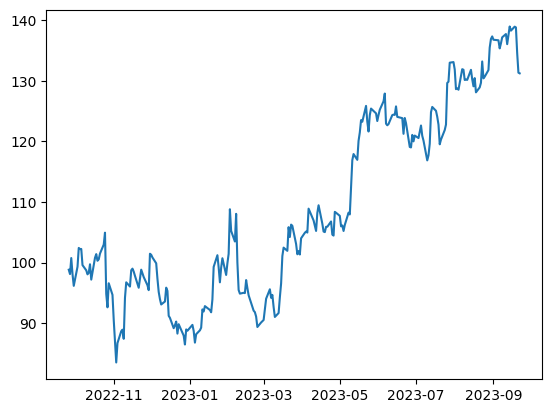

In [50]:
import matplotlib.pyplot as plt
plt.plot(goog['Date'], goog['Close'])

In [122]:
goog['Close_three_movavg'] = goog['Close'].rolling(3).mean()

In [123]:
goog.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_sev_movavg,Close_thirty_movavg,Close_three_movavg
Date,,,,,,,,,
2022-11-14,95.500000,97.180000,95.112999,96.029999,96.029999,24170100,95.643333,91.227144,NaN
2022-11-15,98.669998,100.419998,97.019997,98.720001,98.720001,31831000,97.160001,92.944287,NaN
2022-11-16,98.019997,99.849998,97.902000,98.989998,98.989998,24660200,97.913333,94.421429,97.913333
2022-11-17,97.180000,99.480003,97.099998,98.500000,98.500000,21818700,98.736666,95.791429,98.736666
2022-11-18,99.010002,99.160004,96.739998,97.800003,97.800003,24969900,98.430000,97.277143,98.430000
2022-11-21,97.559998,98.720001,95.669998,95.830002,95.830002,18696900,97.376668,97.514287,97.376668
2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900,96.986669,97.600001,96.986669
2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900,97.326668,97.998572,97.326668
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800,97.916667,97.838572,97.916667


In [124]:
goog['Close_sev_movavg'] = goog['Close'].rolling(7).mean()

In [126]:
goog.drop(columns=['Close_thirty_movavg'], inplace=True)
goog

,Open,High,Low,Close,Adj Close,Volume,Close_sev_movavg,Close_three_movavg
Date,,,,,,,,
2022-11-14,95.500000,97.180000,95.112999,96.029999,96.029999,24170100,NaN,NaN
2022-11-15,98.669998,100.419998,97.019997,98.720001,98.720001,31831000,NaN,NaN
2022-11-16,98.019997,99.849998,97.902000,98.989998,98.989998,24660200,NaN,97.913333
2022-11-17,97.180000,99.480003,97.099998,98.500000,98.500000,21818700,NaN,98.736666
2022-11-18,99.010002,99.160004,96.739998,97.800003,97.800003,24969900,NaN,98.430000
...,...,...,...,...,...,...,...,...
2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600,137.822861,138.750005
2023-09-19,138.250000,139.175003,137.500000,138.830002,138.830002,15479100,138.055718,138.696671
2023-09-20,138.830002,138.839996,134.520004,134.589996,134.589996,21473500,137.605717,137.460002


In [127]:
goog.dropna(inplace=True)

In [128]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume,Close_sev_movavg,Close_three_movavg
Date,,,,,,,,
2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900,97.600001,96.986669
2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900,97.998572,97.326668
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800,97.838572,97.916667
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500,97.447144,97.556666
2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000,97.010001,96.430000


In [129]:
goog

,Open,High,Low,Close,Adj Close,Volume,Close_sev_movavg,Close_three_movavg
Date,,,,,,,,
2022-11-22,96.160004,97.547997,94.410004,97.330002,97.330002,18868900,97.600001,96.986669
2022-11-23,97.339996,99.069000,97.339996,98.820000,98.820000,17568900,97.998572,97.326668
2022-11-25,98.464996,98.940002,97.529999,97.599998,97.599998,8567800,97.838572,97.916667
2022-11-28,97.199997,97.830002,95.889999,96.250000,96.250000,19974500,97.447144,97.556666
2022-11-29,96.000000,96.389999,94.389999,95.440002,95.440002,20220000,97.010001,96.430000
...,...,...,...,...,...,...,...,...
2023-09-18,137.630005,139.929993,137.630005,138.960007,138.960007,16233600,137.822861,138.750005
2023-09-19,138.250000,139.175003,137.500000,138.830002,138.830002,15479100,138.055718,138.696671
2023-09-20,138.830002,138.839996,134.520004,134.589996,134.589996,21473500,137.605717,137.460002


In [130]:
goog['Close'].size

209

In [132]:
goog['Close_sev_movavg'].size

209

In [133]:
goog['Close_three_movavg'].size

209

In [134]:
train, test = train_test_split(goog, test_size=0.2)

In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[['Close_sev_movavg', 'Close_three_movavg']], train['Close'])

LinearRegression()

In [137]:
predicitons = model.predict(test[['Close_sev_movavg', 'Close_three_movavg']])

In [138]:
mse = mean_squared_error(test['Close'], predicitons)
mse

3.729806726498181

<Axes: xlabel='Date'>

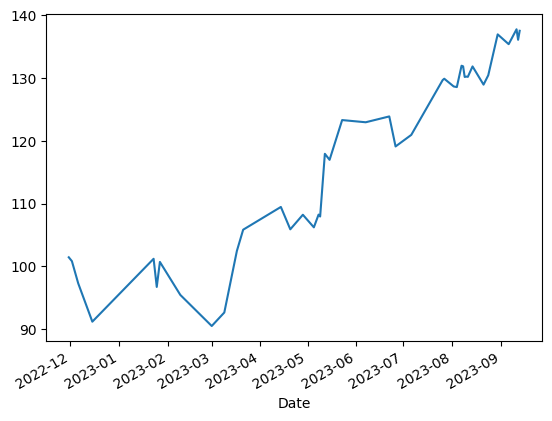

In [139]:
test['Close'].plot()

In [140]:
pred = pd.Series(predicitons, name= 'Closing_predictions')

<Axes: >

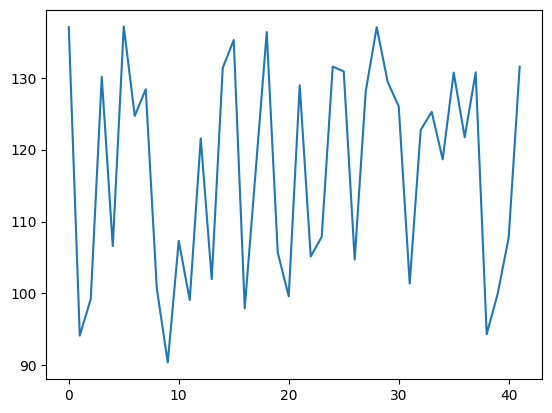

In [141]:
pred.plot()

In [153]:
test.reset_index(inplace=True)

<Axes: xlabel='Date'>

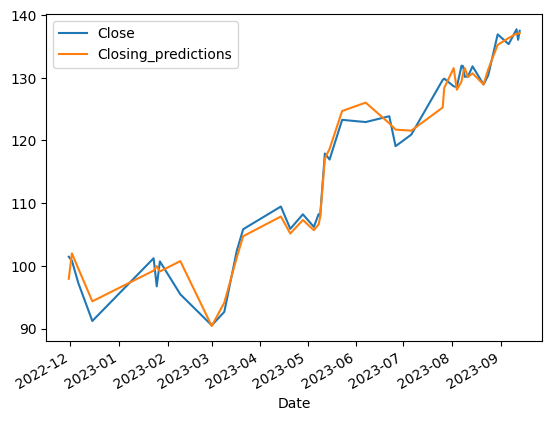

In [157]:
df = test.merge(pred, left_index=True, right_index=True)
df.set_index("Date")[['Close','Closing_predictions']].plot()

In [158]:
(test['Close'] - pred).mean()

-0.07769467480659589

hence the predictions generated by the model is defelected by -0.07 on an average to the original Closing prices.